# **Tsunekazu Ishihara's Idea: Save Pokémon GO! – A Machine Learning Adventure!**



## **Background:**
The CEO of the Pokémon Company, Tsunekazu Ishihara, has visited Niantic's headquarters (Niantic is the publisher of Pokemon GO). After negotiations with the Niantic CEO, John Hanke, they decided to lay off Niantic's entire Data/Machine Learning Engineering team except for the head senior engineer.

### **Project Goal/Stakes:**
Suppose this entire class has been hired as Machine Learning Engineer Interns working side by side with the senior engineer, Kobe Wang, to apply classification and clustering to this dataset: https://www.kaggle.com/datasets/shreyasur965/pokemon-go/data. (**On the top right, click 'Download', unzip the folder, and move `pokemon.csv` to your directory**). The data card in Kaggle explains each feature in the dataset. Can you complete these tasks to secure a full time $1,000,000/yr Machine Learning Engineer position at Niantic?

### **Project Submission (Message from Kobe):**
Kobe: "Hi, I'm Kobe. I'll be your project manager for this internship. I work as the a senior ML Engineer at Niantic. I am responsible for handling the Pokemon GO project. We are excited to have you onboard with us. This is the entire project. If you get above 90% accuracy, you're basically guaranteed the pricey full time return offer. I request that you do NOT delete/modify any part of the question description, given code, and pre-loaded comments in the code block."

You may feel free to add your own additional comments so I understand your thought process. It is crucial that you do so to recieve partial marks to any part of this project."

Submit this Google Colab/Jupyter Notebook file on Gradescope. Cheers!🥂

Just a reminder, for a better a smooth autograder experience, please:
- Write your answers between <font color='green'>`# ANSWER STARTING HERE`</font> and <font color='green'>`# ANSWER ENDS HERE`</font>.
- Do not delete helper cells
- Always use `seed=42` as your `random_state` in the whole notebook.

### **Part A (4 Pts Total)**

#### You are expected to load the Pokemon data and provide some metrics so I know what we are working with. Follow these steps.

##### ***1.1 Import Libraries (0 pt)***

---


Many libraries are imported for you. Import the additional **Sci-kit learn**  modules:
- **Decision Tree Classifier**
- **K Neighbors Classifier**
- **Logistic Regression**
- **Random Forest Classifier**

In [33]:
# Necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score

import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D

import ast
pd.set_option('display.max_columns', None)
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
import seaborn as sns
import warnings # To suppress some warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Add the classifiers to the imports here:
# ANSWER STARTING HERE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# ANSWER ENDS HERE


##### ***1.2 Understanding the Dataset (1 pt)***

---


1. Load the dataset to a dataframe named `pokemon_data`.
2. Print the dimensions of the dataset.
3. Print the column names of the dataframe.

In [34]:
# Load the Pokemon GO dataset
# ANSWER STARTING HERE
pokemon_data = pd.read_csv('pokemon.csv')
print("Dimensions of the dataset:", pokemon_data.shape)
print("Column names:", pokemon_data.columns.tolist())
# ANSWER ENDS HERE


Dimensions of the dataset: (1007, 24)
Column names: ['pokemon_id', 'pokemon_name', 'base_attack', 'base_defense', 'base_stamina', 'type', 'rarity', 'charged_moves', 'fast_moves', 'candy_required', 'distance', 'max_cp', 'attack_probability', 'base_capture_rate', 'base_flee_rate', 'dodge_probability', 'max_pokemon_action_frequency', 'min_pokemon_action_frequency', 'found_egg', 'found_evolution', 'found_wild', 'found_research', 'found_raid', 'found_photobomb']


In [35]:
pokemon_data.head()

,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,distance,max_cp,attack_probability,base_capture_rate,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",NaN,3,1275,0.1,-1.0,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,3,1943,0.1,-1.0,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,3,3112,0.2,-1.0,-1.0,0.15,1.6,0.2,False,True,True,True,True,True
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",NaN,3,1121,0.1,-1.0,-1.0,0.15,1.6,0.2,True,False,True,True,True,True
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,3,1891,0.1,-1.0,-1.0,0.15,1.6,0.2,False,True,True,True,True,True


##### ***1.3 Explore the Data (3 pts)***

---


Let's see what is stored in the dataset first to get a feel for what we can expect. Write only a **single line** of code for each of the first two questions.
1. Print the number of **samples** in the dataset (a numerical value).
2. Print the number of **features** in the dataset (a numerical value)
3. **Create two lists of the unique Pokemon types and rarities**, named `types` and `rarity`, respectively.

Your answer should be similar to:
- Types: ["Grass", "Poison", "Fire", "Water", ...]
- Rarities: ["Standard", "Mythic", "Legendary", "Ultra-Beast"]


In [36]:
# Print the number of samples
# ANSWER STARTING HERE
print("Number of samples:", pokemon_data.shape[0])
# ANSWER ENDS HERE

# Print the number of features
# ANSWER STARTING HERE
print("Number of features:", pokemon_data.shape[1])
# ANSWER ENDS HERE

# Write code to get your two lists.
# ANSWER STARTING HERE

types = pokemon_data['type'].unique().tolist()

rarity = pokemon_data['rarity'].unique().tolist()
# ANSWER ENDS HERE

print("Types:", types)
print("Rarities:", rarity)


Number of samples: 1007
Number of features: 24
Types: ["['Grass', 'Poison']", "['Fire']", "['Fire', 'Flying']", "['Water']", "['Bug']", "['Bug', 'Flying']", "['Bug', 'Poison']", "['Normal', 'Flying']", "['Dark', 'Normal']", "['Poison']", "['Electric']", "['Electric', 'Psychic']", "['Ice', 'Steel']", "['Poison', 'Ground']", "['Fairy']", "['Ice']", "['Ice', 'Fairy']", "['Normal', 'Fairy']", "['Poison', 'Flying']", "['Bug', 'Grass']", "['Ground', 'Steel']", "['Dark']", "['Fighting']", "['Fire', 'Rock']", "['Water', 'Fighting']", "['Psychic']", "['Water', 'Poison']", "['Rock', 'Electric']", "['Psychic', 'Fairy']", "['Water', 'Psychic']", "['Electric', 'Steel']", "['Water', 'Ice']", "['Poison', 'Dark']", "['Ghost', 'Poison']", "['Rock', 'Ground']", "['Electric', 'Grass']", "['Grass', 'Psychic']", "['Grass', 'Dragon']", "['Ground']", "['Fire', 'Ghost']", "['Normal']", "['Poison', 'Fairy']", "['Ground', 'Rock']", "['Grass']", "['Ice', 'Psychic']", "['Water', 'Flying']", "['Rock', 'Water']", "

### **Part B (8 Pts Total)**

#### Now we need to do some scraping of the dataset so you can feed it into the training model.

##### ***2.1 Preprocessing (3 pts)***

---
Before training the model, we need to clean and prepare the data. Please do the following.
1. Print the number of missing data in each column. Please specify which column name you got the number from. You can create a dictionary `missing_data`.
2. Handle the missing values in the `pokemon_data` dataset the best way you can think of. Save the processed file as `pokemon_data`.

*Suggestions:* ~~Get rid of all missing rows of data~~, fill in empty booleans with False, fill in empty with 0s, ~~or do some type of imputation technique such as fill in the empty data with the most common or average of data in that column, etc~~.

UPDATES:
Don't manipulate the NA data with new values and drop the empty rows, otherwise, your dataframe won't pass the auto-grading for one of the later questions.

In [37]:
# Print the number of missing data in each column.
# ANSWER STARTING HERE
missing_data = pokemon_data.isnull().sum().to_dict()
print("Missing data in each column:", missing_data)
# ANSWER ENDS HERE


# Write a code that handles missing values in the dataset by discarding them
# ANSWER STARTING HERE
pokemon_data = pokemon_data.fillna({col: False for col in pokemon_data.select_dtypes(include='bool').columns})
pokemon_data = pokemon_data.fillna(0)
# ANSWER ENDS HERE


Missing data in each column: {'pokemon_id': 0, 'pokemon_name': 0, 'base_attack': 0, 'base_defense': 0, 'base_stamina': 0, 'type': 0, 'rarity': 0, 'charged_moves': 0, 'fast_moves': 0, 'candy_required': 536, 'distance': 0, 'max_cp': 0, 'attack_probability': 103, 'base_capture_rate': 103, 'base_flee_rate': 103, 'dodge_probability': 103, 'max_pokemon_action_frequency': 103, 'min_pokemon_action_frequency': 103, 'found_egg': 263, 'found_evolution': 263, 'found_wild': 263, 'found_research': 263, 'found_raid': 263, 'found_photobomb': 263}


##### ***2.2 Splitting, Training, and Testing (6 pts)***

---

Typically in machine learning, we wish to split the data into various portions in order to let a machine learning model train itself on one part of the data and test itself on another part of the data. Splitting also helps prevent overfitting, ensuring the model can make accurate predictions on new, unseen data.

Training data is used to learn the model, while testing data assesses its generalization to unseen examples. I would recommend using **80%** of the data  for training and **20%** for testing.

Before we split the data, we are going to help you process the raw data a little bit more:
 1. We convert the boolean strings into 1 and 0
 2. We add a `rating` column at the end of the dataframe, so that we can predict the rating classification.

In [38]:
# Helper function

# Function to convert True/False to 1/0, and ignore strings
def convert_boolean(value):
    if isinstance(value, bool):
        return int(value)
    return value

# Apply the function to the entire DataFrame
pokemon_data = pokemon_data.map(convert_boolean)

# Alternatively, you can apply it to only specific column types
pokemon_data.update(pokemon_data.select_dtypes(include=['bool']).astype(int))

# Normalize the values between 0 and 1
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize important columns
pokemon_data['normalized_base_attack'] = normalize(pokemon_data['base_attack'])
pokemon_data['normalized_base_defense'] = normalize(pokemon_data['base_defense'])
pokemon_data['normalized_base_stamina'] = normalize(pokemon_data['base_stamina'])
pokemon_data['normalized_max_cp'] = normalize(pokemon_data['max_cp'])
pokemon_data['normalized_attack_probability'] = normalize(pokemon_data['attack_probability'])

# Assign numerical values to rarity (assuming rarity categories are 'common', 'rare', 'ultra-rare')
rarity_mapping = {'Standard': 1, 'Mythic': 2, 'Legendary': 3, 'Ultra-Beast':4}
pokemon_data['rarity_score'] = pokemon_data['rarity'].map(rarity_mapping)

# Weights for the attributes
w1, w2, w3, w4, w5, w6 = 0.15, 0.15, 0.15, 0.15, 0.2, 0.05

# Calculate rating
pokemon_data['rating'] = (
    w1 * pokemon_data['normalized_base_attack'] +
    w2 * pokemon_data['normalized_base_defense'] +
    w3 * pokemon_data['normalized_base_stamina'] +
    w4 * pokemon_data['normalized_max_cp'] +
    w5 * pokemon_data['rarity_score'] +
    w6 * pokemon_data['normalized_attack_probability']
)

# Map rating to a scale from 1 to 10
pokemon_data = pokemon_data.fillna(0)
pokemon_data['rating'] = (normalize(pokemon_data['rating']) * 9 + 1).round().astype(int)

# Drop the intermediate columns, keeping only the original columns and the rating
columns_to_drop = ['normalized_base_attack', 'normalized_base_defense', 'normalized_base_stamina',
                   'normalized_max_cp', 'normalized_attack_probability', 'rarity_score']
pokemon_data = pokemon_data.drop(columns=columns_to_drop)

# Display the DataFrame with ratings
unique_pokemon_data = pokemon_data.sort_values(by='rating', ascending=False).drop_duplicates(subset='pokemon_name', keep='first')
ranked_pokemon = unique_pokemon_data[['pokemon_name', 'rating']].sort_values(by='rating', ascending=False)
print(ranked_pokemon)
print(pokemon_data['rarity'].unique())
pokemon_data.head()


    pokemon_name  rating
889    Eternatus      10
791       Lunala       8
645       Kyurem       8
644     Landorus       8
643       Zekrom       8
..           ...     ...
798     Guzzlord       1
794    Pheromosa       1
793     Buzzwole       1
795    Xurkitree       1
805  Blacephalon       1

[1007 rows x 2 columns]
['Standard' 'Legendary' 'Mythic' 'Ultra beast']


,pokemon_id,pokemon_name,base_attack,base_defense,base_stamina,type,rarity,charged_moves,fast_moves,candy_required,distance,max_cp,attack_probability,base_capture_rate,base_flee_rate,dodge_probability,max_pokemon_action_frequency,min_pokemon_action_frequency,found_egg,found_evolution,found_wild,found_research,found_raid,found_photobomb,rating
0,1,Bulbasaur,118,111,128,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Seed Bomb', 'Power Whip']","['Vine Whip', 'Tackle']",0.0,3,1275,0.1,-1.0,-1.0,0.15,1.6,0.2,1,0,1,1,1,1,4
1,2,Ivysaur,151,143,155,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Solar Beam', 'Power Whip']","['Razor Leaf', 'Vine Whip']",25.0,3,1943,0.1,-1.0,-1.0,0.15,1.6,0.2,0,1,1,1,1,1,4
2,3,Venusaur,198,189,190,"['Grass', 'Poison']",Standard,"['Sludge Bomb', 'Petal Blizzard', 'Solar Beam']","['Razor Leaf', 'Vine Whip']",100.0,3,3112,0.2,-1.0,-1.0,0.15,1.6,0.2,0,1,1,1,1,1,4
3,4,Charmander,116,93,118,['Fire'],Standard,"['Flame Charge', 'Flame Burst', 'Flamethrower']","['Ember', 'Scratch']",0.0,3,1121,0.1,-1.0,-1.0,0.15,1.6,0.2,1,0,1,1,1,1,4
4,5,Charmeleon,158,126,151,['Fire'],Standard,"['Fire Punch', 'Flame Burst', 'Flamethrower']","['Ember', 'Fire Fang']",25.0,3,1891,0.1,-1.0,-1.0,0.15,1.6,0.2,0,1,1,1,1,1,4


Using every feature as input to the training process is not a good idea. Some features are not related to Pokemon rating, so let's exclude them from our feature set.
1. Exclude the following from the input data `X`: `rating`, `pokemon_name`, `type`, `rarity`, `charged_moves`, and `fast_moves`.
Note: we drop `rating` because it is our **prediction target**.
2. Store the label variable in `Y`.

Let the criteria for a good catch be a rating greater than six.

In [39]:
# Initialize X and Y
# ANSWER STARTING HERE
X = pokemon_data.drop(columns=['rating', 'pokemon_name', 'type', 'rarity', 'charged_moves', 'fast_moves'])
y = (pokemon_data['rating'] > 6).astype(int)

# ANSWER ENDS HERE

3. Use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from the Scikit-learn module to split the training data using the proposed 80/20 ratio.

In [40]:
seed = 42 # always use this seed number as your random_state in the whole notebook
test_size=0.2

# Split your training data and use the seed to get consistent results.
# ANSWER STARTING HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ANSWER ENDS HERE

4. **Normalize** both the training and test sets so that the model is trained on features with a consistent scale. **You can use any scaler from the Scikit-learn module to do this.** If we don't normalize the data, the model may struggle to converge during training because some features could dominate the loss function due to their larger scale. By normalizing the data, we ensure that each feature contributes equally to the learning process, improving the model's ability to find an optimal solution. (eg. [StandardScaler documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html))

In [41]:
# ANSWER STARTING HERE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ANSWER ENDS HERE


### **Part C (15 Pts Total)**

#### This is going to be the main source of evaluation for the return offer. Be thorough with your model search. You will train a **Logistic Regression** Model, and 3 different classifiers: **KNN**, **DecisionTree**, **Logistic Regression** and **Random Forest**.

##### ***3.1 Load Models (4 pts)***

---

1. Create a python dictionary named `models` that maps the names of the models to their constructors.

In [42]:
# Initialize the models
# ANSWER STARTING HERE
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
         }
# ANSWER ENDS HERE



##### ***3.2 K-fold Cross-Validation (8 pts)***
Using the standardized feature sets, do the following:
1. Given five folds and the object with the specified number of splits, perform **k-folds cross-validation** for **each** model.
2. Print the **name** of the model and **cross validation accuracy** (mean and standard deviation) for each.

[Cross Validation Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [43]:
# Perform k-fold Cross-Validation for each model
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)

for model_name, model in models.items():
    np.random.seed(seed)
    #ANSWER STARTING HERE
    scores = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring='accuracy')
    print(f"{model_name}: Mean accuracy = {scores.mean():.4f}, Standard deviation = {scores.std():.4f}")
    # ANSWER ENDS HERE


K-Nearest Neighbors: Mean accuracy = 0.9665, Standard deviation = 0.0063
Decision Tree: Mean accuracy = 0.9739, Standard deviation = 0.0173
Logistic Regression: Mean accuracy = 0.9689, Standard deviation = 0.0096
Random Forest: Mean accuracy = 0.9789, Standard deviation = 0.0093


##### ***3.3 Question: What is the most accurate ML model from above choice? Why? (3 pts)***
ANSWER STARTING HERE

Based on the cross-validation results printed above, the most accurate ML model is Random Forest because it is the model with the highest mean accuracy so it is considered to be the most accurate. It also makes sense since Random Forest tends to perform well due to its ensemble nature, combining multiple decision trees to reduce overfitting and improve generalization.

### **Part D (12 Pts Total)**
#### Tsunekazu wants you to deploy of all the models to production. Evaluate all of the models on the heldout test set.

##### ***4.1 Model Evaluation (6 pts)***

---


For each of the models do the following in order to evaluate each of them properly:
- **Train** each of the models
- Print each of the **accuracies** of the models by their **names** in this format: *Accuracy of (model name): (accuracy of the model)*.
- Print a **classification report** with the accuracy, precision, recall and f1-score of each model.

In [44]:
# Train each model using the training data
for model_name, model in models.items():
    # Set random seed for reproducibility
    np.random.seed(seed)
    #ANSWER STARTING HERE
    model.fit(X_train_scaled, y_train)

    # ANSWER ENDS HERE

# Evaluate the performance of each model
for model_name, model in models.items():
    np.random.seed(seed)
    #ANSWER STARTING HERE
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name}: {accuracy:.2f}") # Your accuracy table header here
    print(f"Classification report for {model_name}: {classification_report(y_test, y_pred)}") # Implement your classification report here
    # ANSWER ENDS HERE


Accuracy of K-Nearest Neighbors: 0.98
Classification report for K-Nearest Neighbors:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       189
           1       0.91      0.77      0.83        13

    accuracy                           0.98       202
   macro avg       0.95      0.88      0.91       202
weighted avg       0.98      0.98      0.98       202

Accuracy of Decision Tree: 0.99
Classification report for Decision Tree:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       189
           1       0.92      0.92      0.92        13

    accuracy                           0.99       202
   macro avg       0.96      0.96      0.96       202
weighted avg       0.99      0.99      0.99       202

Accuracy of Logistic Regression: 0.99
Classification report for Logistic Regression:               precision    recall  f1-score   support

           0       0.99      0.99      0.99     

##### ***4.2 Model Interpretation (6 pts)***

---

- **Interpret** the results of the classification models (list the models which got the best scores for Accuracy, Precision, Recall and F1 score).
- **Recommend the best model according to your analysis.** Hopefully your best model has over a 90% accuracy as this will guarantee your return offer.

**Question: Which model according to your analysis was the best at predicting the Pokemon Type? Why? DO NOT just say that the accuracy is better than the rest of the models. That is obvious.**

***Interpretation of model performance based on the provided classification reports:***

**K-Nearest Neighbors (KNN)**:
- Accuracy: 98%
- Precision, Recall, and F1-score for class 1 are lower (precision: 0.91, recall: 0.77, F1-score: 0.83), indicating that KNN struggles slightly with minority class predictions.
- High accuracy and weighted F1-score indicate it performs well overall but may misclassify rare cases.

**Decision Tree**:
- Accuracy: 99%
- High precision and recall (0.92 for class 1) suggest it balances identifying both classes effectively.
- F1-score for class 1 is consistent (0.92), indicating reliable performance across metrics.

**Logistic Regression**:
- Accuracy: 99%
- Class 1 precision and recall are 0.86 and 0.92 respectively, yielding an F1-score of 0.89.
- Strong weighted averages show that this model is effective and well-calibrated.

**Random Forest**:
- Accuracy: 99%
- Class 1 precision is perfect (1.00), but recall drops to 0.77, leading to an F1-score of 0.87.
- The drop in recall for the minority class may indicate that it is conservative in predicting positive cases.

***Best Model Recommendation:***

The Decision Tree model is recommended based on balanced precision, recall, and F1-scores for both classes. It achieves high accuracy, demonstrates consistent detection of the minority class (class 1), and offers robust performance with minimal compromise between precision and recall. While Logistic Regression also performs well, the Decision Tree provides slightly better recall and F1 for class 1, crucial for tasks where capturing true positives is essential. Random Forest, although highly accurate, sacrifices recall for class 1, making it less suitable when balanced detection is prioritized.

### **Part E (10 Pts Total)**

#### Seeing all the effort and hard work, it looks as if most people have done well with this project🎉! With all the input features you have used, there is still no concrete way of figuring out whether a feature is more important than another. We only really used intuition for that. Thus, we shall do some feature engineering to determine this.

##### ***5.1 What are your top 4 features used to predict Pokemon type (10 pts)?***
- Use Random Forest to create a dataframe for **feature importance** named **feature_importance_df**.
- **Extract**, **Sort**, and **Print** the **top 4** features from that dataframe.

Here are some references to help you:

[Feature Importance 1](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_)

[Feature Importance 2](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_)



In [45]:
# Extract the feature importances from the most accurate model
# ANSWER STARTING HERE
importances = models["Random Forest"].feature_importances_

# Creating a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Displaying feature importances
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_4_features = feature_importance_df.head(4)
print("Top 4 features:")
print(top_4_features)
# ANSWER ENDS HERE


Top 4 features:
        Feature  Importance
5      distance    0.260897
6        max_cp    0.173321
2  base_defense    0.134319
1   base_attack    0.100066


### Part F (17 Points Total)

Now you'll learn about clustering techniques using our pokemon datasets. You'll perform data preprocessing, apply dimensionality reduction techniques (PCA and t-SNE), and use K-means clustering to analyze the data. Finally, you'll visualize the results.



##### ***6.1.1 Elbow Method (2.5 pts)***

In this part, you will determine the optimal number of clusters for a given dataset using the **Elbow Method**. The goal is to identify the point where adding more clusters results in minimal improvement in clustering quality, known as the "elbow point."

The *distortion* for a given number of clusters $k$ can be represented as:

$$
\text{Distortion} = \frac{1}{n} \sum_{i=1}^{n} \min_{j} \lVert \mathbf{x}_i - \mathbf{\mu}_j \rVert
$$

Task A: Implement your own distortion function to determine the different numbers of clusters, ranging from 1 to 10. Plot the elbow plot and guess the elbow point $k$.

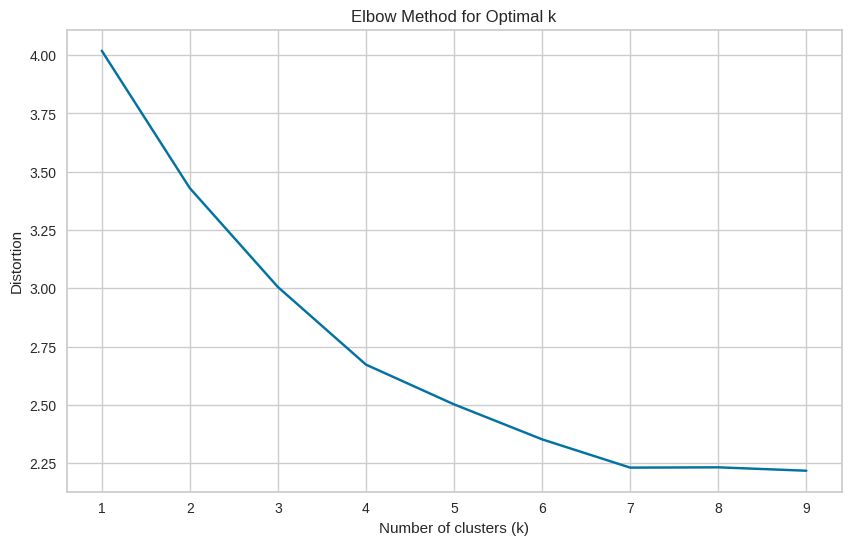

In [46]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # ANSWER STARTING HERE

    # Building and fitting the model
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    # Append your distortion value
    distortions.append(sum(np.min(cdist(X_train_scaled, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_train_scaled.shape[0])
    inertias.append(kmeans.inertia_)
    # Save it to mapping1 and mapping2
    mapping1[k] = distortions[-1]
    mapping2[k] = inertias[-1]
# Plot
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, 'bx-', label='Distortion')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()
# ANSWER ENDS HERE


To determine the optimal number of clusters, we have to select the value of $k$ at the “elbow”, i.e. the point after which the distortion starts decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 3.


In [47]:
k_cluster = 3

##### ***6.1.2 KElbowVisualizer (2.5 pts)***
Task B: Use the `KElbowVisualizer` from the `yellowbrick` library to verify the conclusion above. See [Elbow Method
](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

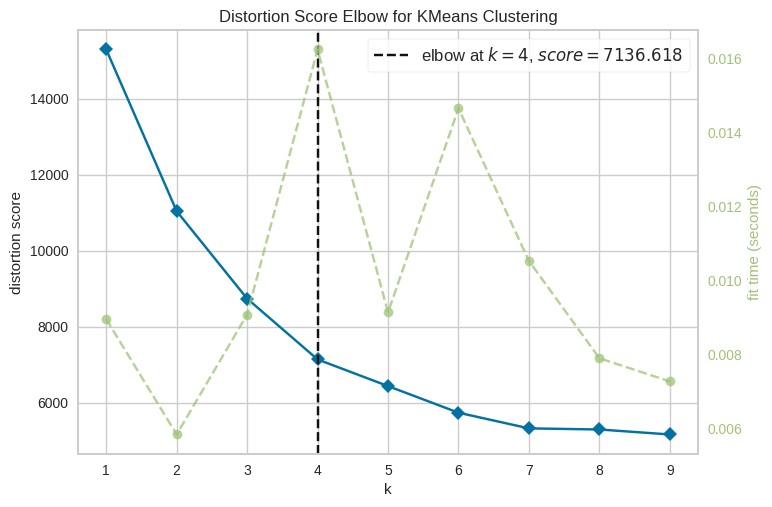

Silhouette score for K=2: 0.3528
Silhouette score for K=3: 0.3443
Silhouette score for K=4: 0.2930
Silhouette score for K=5: 0.3004


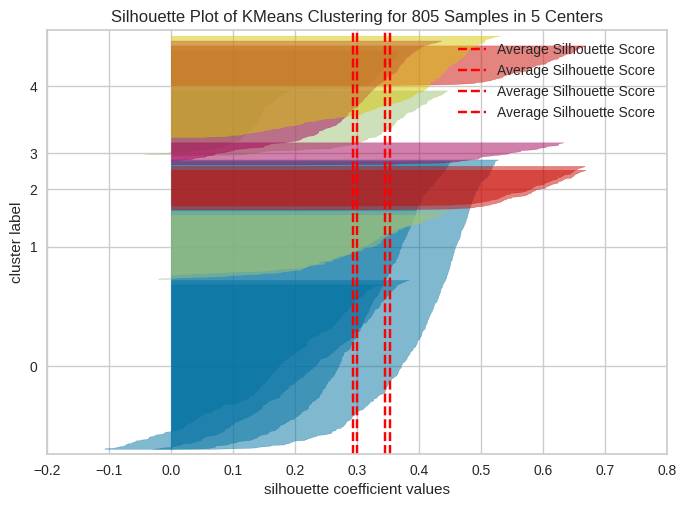

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 805 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

# ANSWER STARTING HERE
# Load the dataset

# Instantiate the clustering model and visualizer
kmeans = KMeans(random_state=42)
elbow_visualizer = KElbowVisualizer(kmeans, k=(1, 10))
elbow_visualizer.fit(X_train_scaled)
elbow_visualizer.show()

# Plot the SilhouetteVisualizer plot for K=2 to 5
for i in range(2,6):

    # Create KMeans model
    kmeans = KMeans(n_clusters=i, random_state=42)
    # Use SilhouetteVisualizer to visualize and get the silhouette score
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X_train_scaled)
    # Get the silhouette score
    print(f"Silhouette score for K={i}: {visualizer.silhouette_score_:.4f}")
# Display the silhouette plot
visualizer.show()
# ANSWER ENDS HERE


##### ***6.1.3 Question: According to the plots above, why do you think we chose K=3? (1 pts)***

ANSWER STARTING HERE

Based on the Elbow Method and Silhouette Scores, K=3 was chosen because:
1. The Elbow Method plot shows that the distortion score curve starts to level off at K=3, indicating diminishing returns in clustering quality beyond this point.

2. The silhouette scores for K=2, K=3, K=4, and K=5 reveal that K=3 achieves a good balance between high average silhouette score and clear cluster separation.

3. Choosing K=3 maintains a higher silhouette score compared to K=4 and K=5, indicating that the clusters formed at K=3 are more cohesive and well-separated.
Therefore, K=3 provides an optimal trade-off between clustering compactness and separation.

##### ***6.2.1 Extract top features (1 pts)***
Extract the top 4 features you defined in Part E for show its clustering for the following steps. Name your feature dataframe `X`.


In [49]:
# TODO: Select most relevant features for clustering
data = pokemon_data

# ANSWER STARTING HERE
features = feature_importance_df.head(4)['Feature'].tolist()
X = data[features]
# ANSWER ENDS HERE
print(X)

      distance  max_cp  base_defense  base_attack
0            3    1275           111          118
1            3    1943           143          151
2            3    3112           189          198
3            3    1121            93          116
4            3    1891           126          158
...        ...     ...           ...          ...
1002        20    3955           221          269
1003        20    4821           196          280
1004        20    3990           171          279
1005        20    4545           223          263
1006        20    4545           223          263

[1007 rows x 4 columns]


We wish to standardize the feature sets in order to make sure that the PCA or t-SNE is not biased by differences in scales within the data. Standardization aids with consistency in the data.

##### ***6.2.2 Normalize the data using StandardScaler. (1 pts)***

- **Standardize** the features and save it as `X_scaled`.

*Hint:* [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [50]:
# TODO: Normalize the data using StandardScaler
# ANSWER STARTING HERE
X_scaled = scaler.fit_transform(X)
# ANSWER ENDS HERE


There are varying reasons for using a dimensionality reduction step such as PCA prior to data segmentation. By reducing the number of features, we are improving the performance of our algorithm. In addition, by decreasing the number of features the noise is also reduced.

#### PCA

Principal Component Analysis (PCA) is a dimensionality reduction technique that finds directions (principal components) maximizing variance in a dataset. It's an orthogonal linear transformation mapping data to a new coordinate system [1].

PCA steps for a dataset $X$ with $n$ samples and $p$ features:

1. Center the data.
2. Compute covariance matrix $\Sigma = \frac{1}{n-1}X^TX$.
3. Calculate eigenvectors and eigenvalues of $\Sigma$.
4. Sort eigenvectors by descending eigenvalues.
5. Select top $k$ eigenvectors as new basis.

Project original data onto this new basis for transformed data.

PCA is simple and effective for linear relationships but may not suit complex, non-linear structures [2].

For more in-depth reading on PCA:

[1] Scikit-learn PCA documentation: [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

[2] Jolliffe, I. T. (2002). Principal Component Analysis, Second Edition. Springer Series in Statistics.


##### ***6.3.1 Use a PCA function to return the transformed data. (2.5 pts)***


In [51]:
# TODO: Apply PCA and return the transformed data

def apply_pca(X_scaled, n_components=2):
    # ANSWER STARTING HERE
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    # ANSWER ENDS HERE
    return pca, X_pca
    # Apply PCA

pca, X_pca = apply_pca(X_scaled)

#### t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a non-linear dimensionality reduction technique developed by Laurens van der Maaten and Geoffrey Hinton in 2008, designed to visualize high-dimensional data. Unlike PCA, which focuses on preserving global variance, t-SNE preserves local structures, making it ideal for identifying clusters in complex datasets.

Core Idea:
- High-dimensional space: t-SNE constructs a probability distribution over pairs of points, where similar points have a higher probability of being picked.
- Low-dimensional space: It defines a similar probability distribution and minimizes the Kullback-Leibler divergence between the two spaces.
- In high-dimensional space, t-SNE measures similarities using a Gaussian distribution, while in low-dimensional space, it uses a Student t-distribution to maintain neighborhood relationships.

Though powerful for visualizing clusters, t-SNE can be computationally intensive for large datasets and may not capture global structures as effectively as local ones.


For more detailed information on t-SNE:
- Scikit-learn t-SNE documentation: [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

- van der Maaten, L., & Hinton, G. (2008). Visualizing data using t-SNE. Journal of Machine Learning Research, 9(Nov), 2579-2605.

- van der Maaten, L. (2014). Accelerating t-SNE using tree-based algorithms. Journal of Machine Learning Research, 15(1), 3221-3245.

- Wattenberg, M., Viégas, F., & Johnson, I. (2016). How to use t-SNE effectively. Distill, 1(10), e2.

##### ***6.3.2 Extra Credit: Use a t-SNE function to return the transformed data. (2.5 pts)***


In [52]:
# TODO: Apply t-SNE and return the transformed data
# Change this part to vis

def apply_tsne(X_scaled, n_components=2, random_state=seed):
    # ANSWER STARTING HERE
    tsne = TSNE(n_components=n_components, random_state=random_state)
    X_tsne = tsne.fit_transform(X_scaled)
    # ANSWER ENDS HERE
    return tsne, X_tsne

# Apply t-SNE
tsne, X_tsne = apply_tsne(X_scaled)


#### K-Means Clustering

K-Means is a popular unsupervised learning algorithm used for clustering, where the goal is to partition data into K clusters based on feature similarity. The algorithm works by iteratively assigning data points to the nearest centroid (cluster center) and updating centroids to minimize the variance within each cluster. It starts by randomly initializing centroids and repeats the process until the centroids stabilize (convergence). K-Means is efficient for large datasets but sensitive to the choice of K and initial centroids. In your homework, you'll implement K-Means to explore how well it groups your data based on similarity!







##### ***6.4 Apply K-means clustering and return the cluster labels (3 pts)***


In [53]:
# TODO: Apply K-means clustering and return the cluster labels
def apply_kmeans(X, n_clusters, random_state=seed):
    # ANSWER STARTING HERE
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    kmeans.fit(X)
    labels = kmeans.labels_
    # ANSWER ENDS HERE
    return labels

# Apply K-means to both PCA and t-SNE results
pca_labels = apply_kmeans(X_pca, n_clusters = k_cluster)
tsne_labels = apply_kmeans(X_tsne, n_clusters = k_cluster)



Visualize your clustering!

[[-1.41286501  0.22769574]
 [-0.48509426 -0.18161398]
 [ 0.95174349 -0.81015299]
 ...
 [ 3.22955215  1.44579134]
 [ 3.8522621   1.26750632]
 [ 3.8522621   1.26750632]]
(1007, 2)
(1007,)


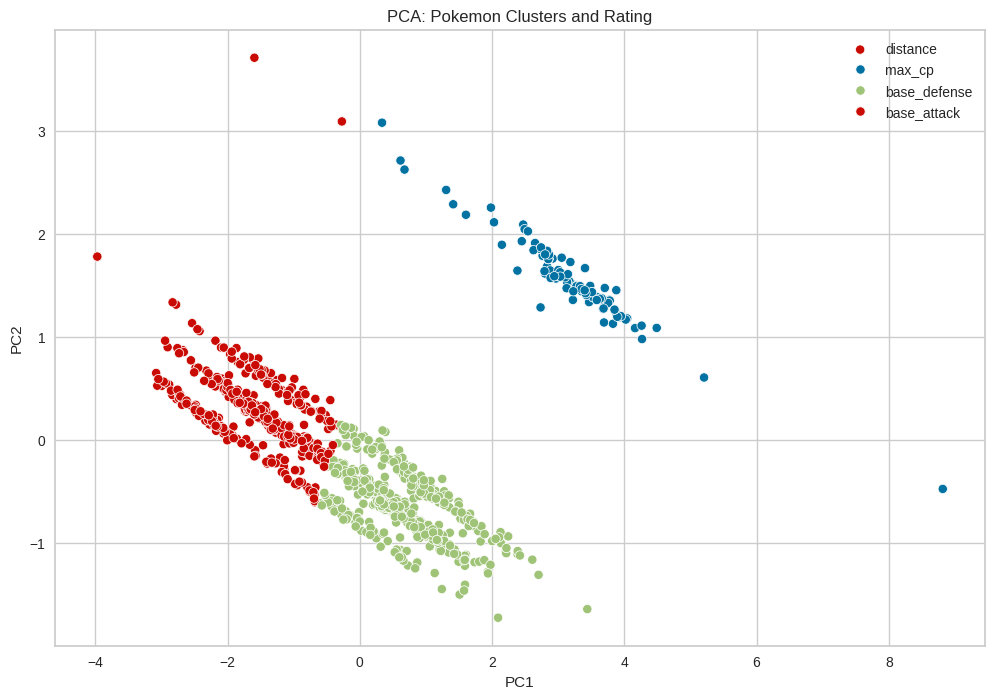

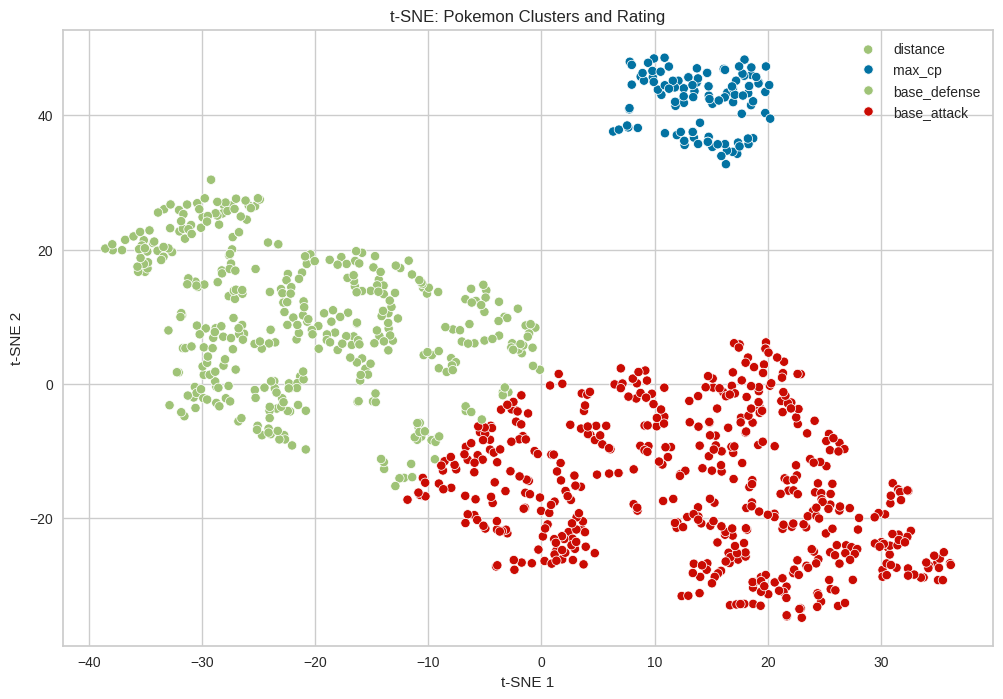

In [54]:
## Visualization

def plot_clusters(X, labels, rating, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(12, 8))
    kmeans = KMeans(n_clusters=k_cluster, random_state=seed).fit(X)

    data['Cluster'] = pd.Categorical(kmeans.labels_)
    sns.scatterplot(x=X[:, 0],y=X[:, 1], hue="Cluster", data=data,s=45,legend="full")
    plt.legend(labels=[features[0], features[1], features[2], features[3]])

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

print(X_pca)
print(X_pca.shape)
print(data['rating'].shape)

# Visualize PCA results
plot_clusters(X_pca, pca_labels, data['rating'],
              'PCA: Pokemon Clusters and Rating', 'PC1', 'PC2')

# Visualize t-SNE results
plot_clusters(X_tsne, tsne_labels, data['rating'],
              't-SNE: Pokemon Clusters and Rating', 't-SNE 1', 't-SNE 2')

##### ***6.5 Compare the clustering results from PCA and t-SNE. Which method seems to provide better separation of clusters? (1 pts)***

ANSWER STARTING HERE

Based on the clustering visualizations:

PCA Results: The clusters are somewhat separated, but there is overlap between some groups. PCA preserves the global structure of the data, which can be useful for capturing broader groupings. However, it may not excel in distinguishing tightly grouped clusters.

t-SNE Results: The clusters appear more distinct and separated compared to the PCA plot. t-SNE excels in preserving local relationships, which helps in better visualizing smaller, compact clusters.

Conclusion:
t-SNE provides better separation of clusters in this case as it highlights local patterns effectively, making it easier to identify distinct groupings in complex datasets.

# Your analysis here


**You have been promoted!!**

**You are now one of the consulting company's elite employees! 🎊🎉🥂🥳**

![](https://media.giphy.com/media/JIX9t2j0ZTN9S/giphy.gif?cid=790b76111hlwamin05rcv1ujslgjh5o49haj07h4wpuvwkgz&ep=v1_gifs_search&rid=giphy.gif&ct=g)

### Extra Credit ✨ (7 points total)
The matplotlib and seaborn libraries are great tools for visualizing data.

They are used to create legible and complex graphs that are essential in data interpretation and analysis.

##### ***7.1 Visualize the distribution of each feature in the original dataset for different rating classes (3 pts)***
- **Plot** out histograms for each feature. You can use a for loop.
- Label the **title** of each histogram "Distribution of (Feature Name) by Rating"
- Label the **axes** appropriately and display each histogram.

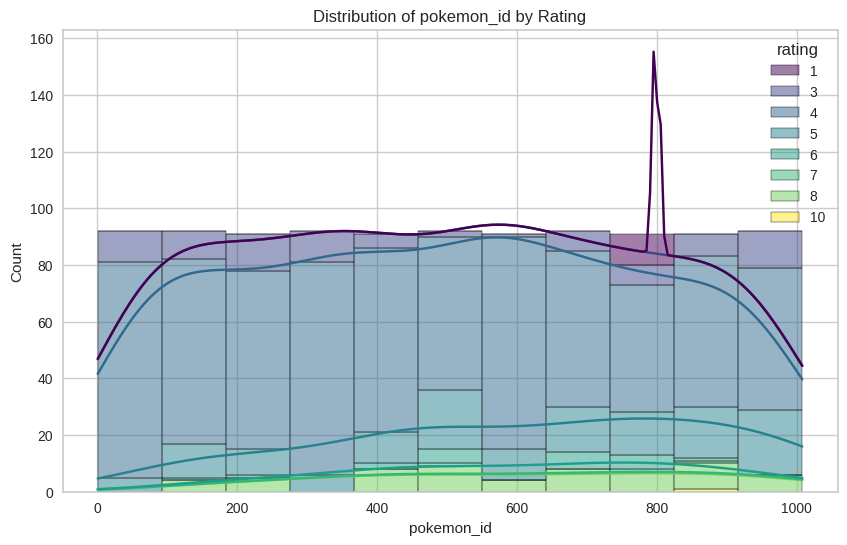

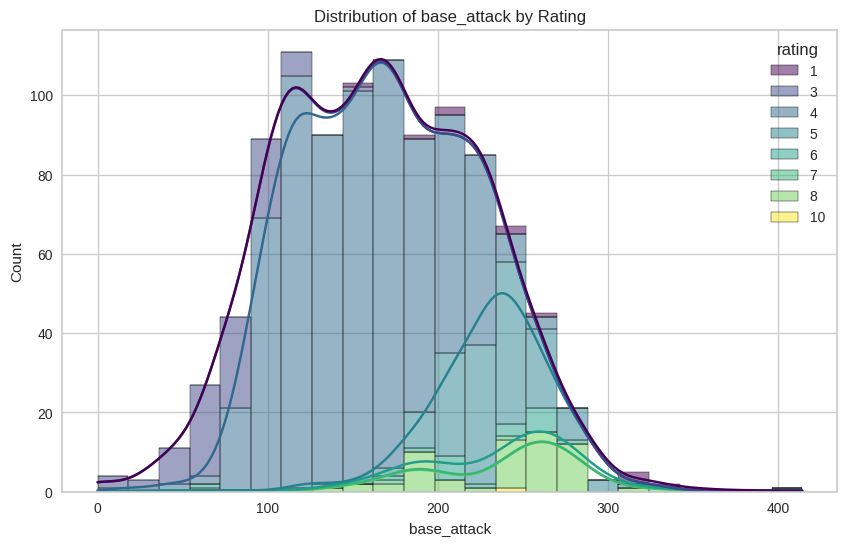

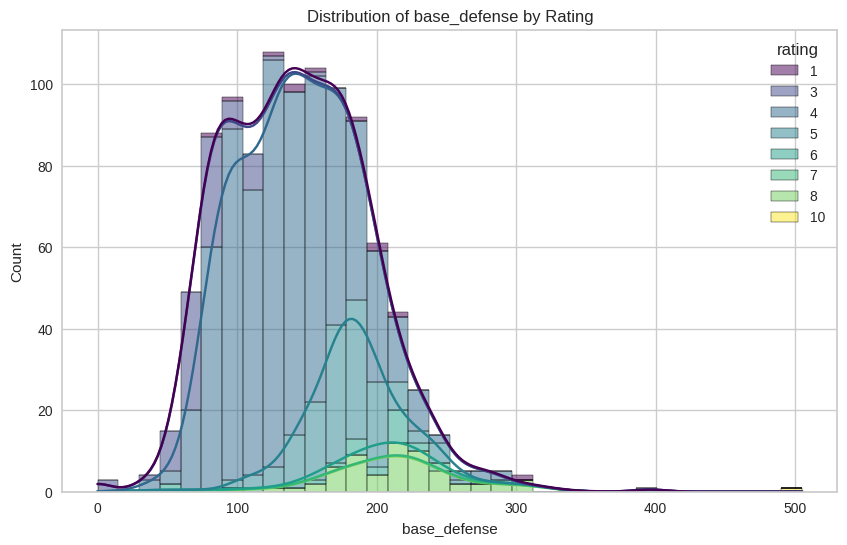

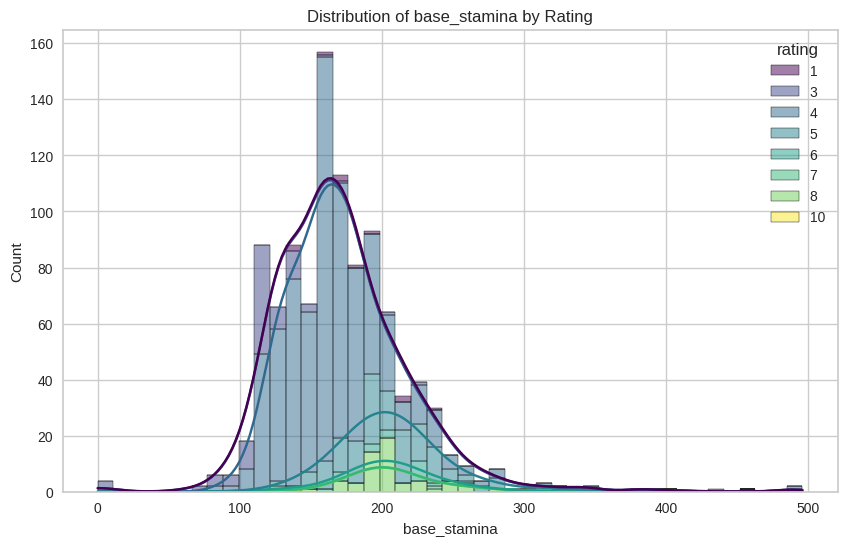

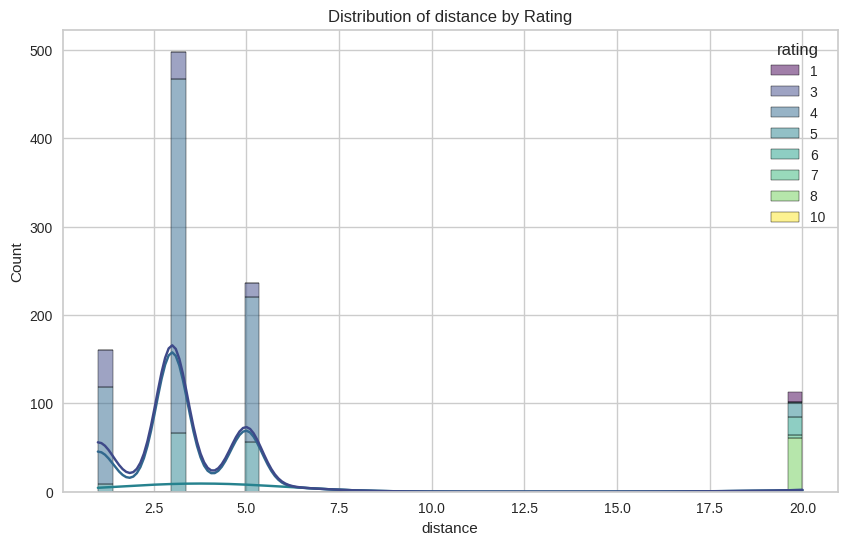

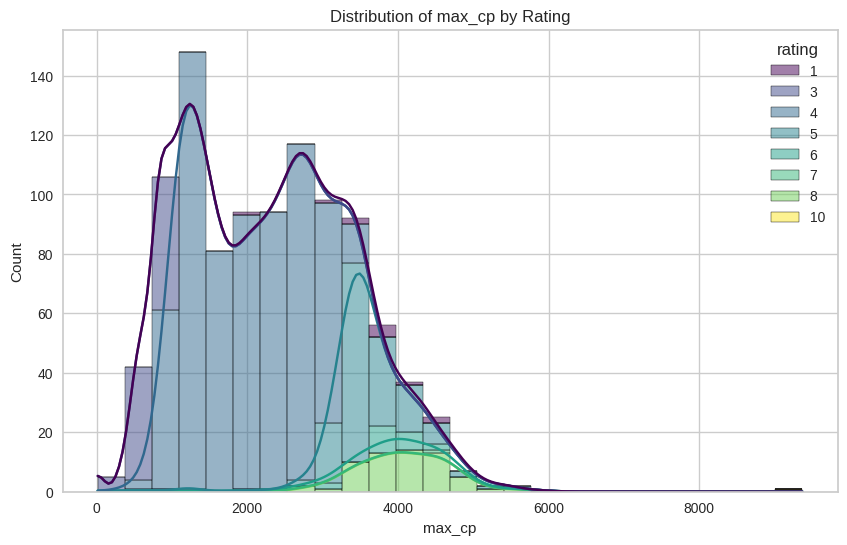

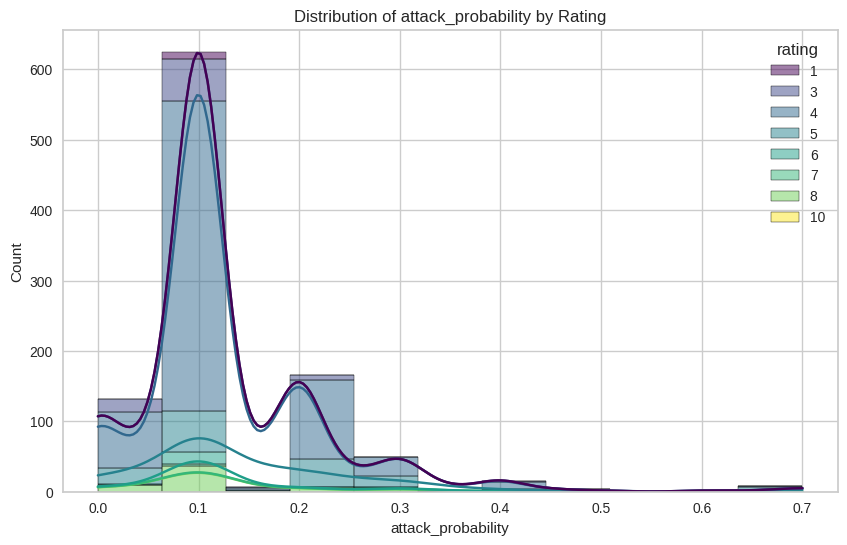

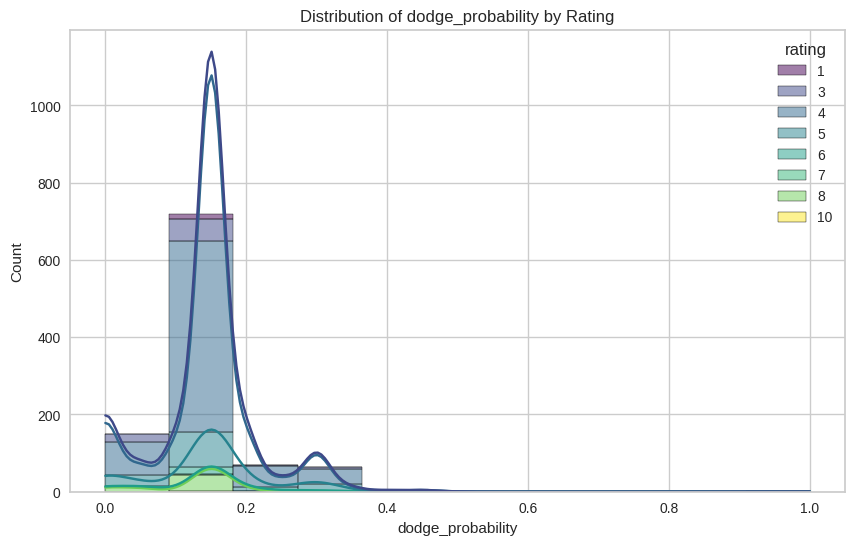

In [55]:
histogram_pd = pokemon_data.drop(columns=['pokemon_name','type','rarity','charged_moves','candy_required','fast_moves','base_capture_rate','base_flee_rate','max_pokemon_action_frequency','min_pokemon_action_frequency'])
histogram_pd = histogram_pd.iloc[:, list(range(8)) + [-2]]
histogram_pd.head()

# ANSWER STARTING HERE
# Histograms for each feature with rating hue
for feature in histogram_pd.columns[:-1]:  # Exclude 'rating' column
    plt.figure(figsize=(10, 6))

    # Create the histogram
    sns.histplot(data=histogram_pd, x=feature, hue='rating', multiple='stack', palette='viridis', kde=True)
    plt.title(f"Distribution of {feature} by Rating")
    plt.xlabel(feature)
    plt.ylabel('Count')
    # Create a custom legend
    # Add a colorbar
    plt.show()
# ANSWER ENDS HERE


##### ***7.2 Explore correlations between features and Rating ratings (2 pts)***
- Create a **correlation matrix** based on the correlations between features and rating.
- **Display** the matrix.

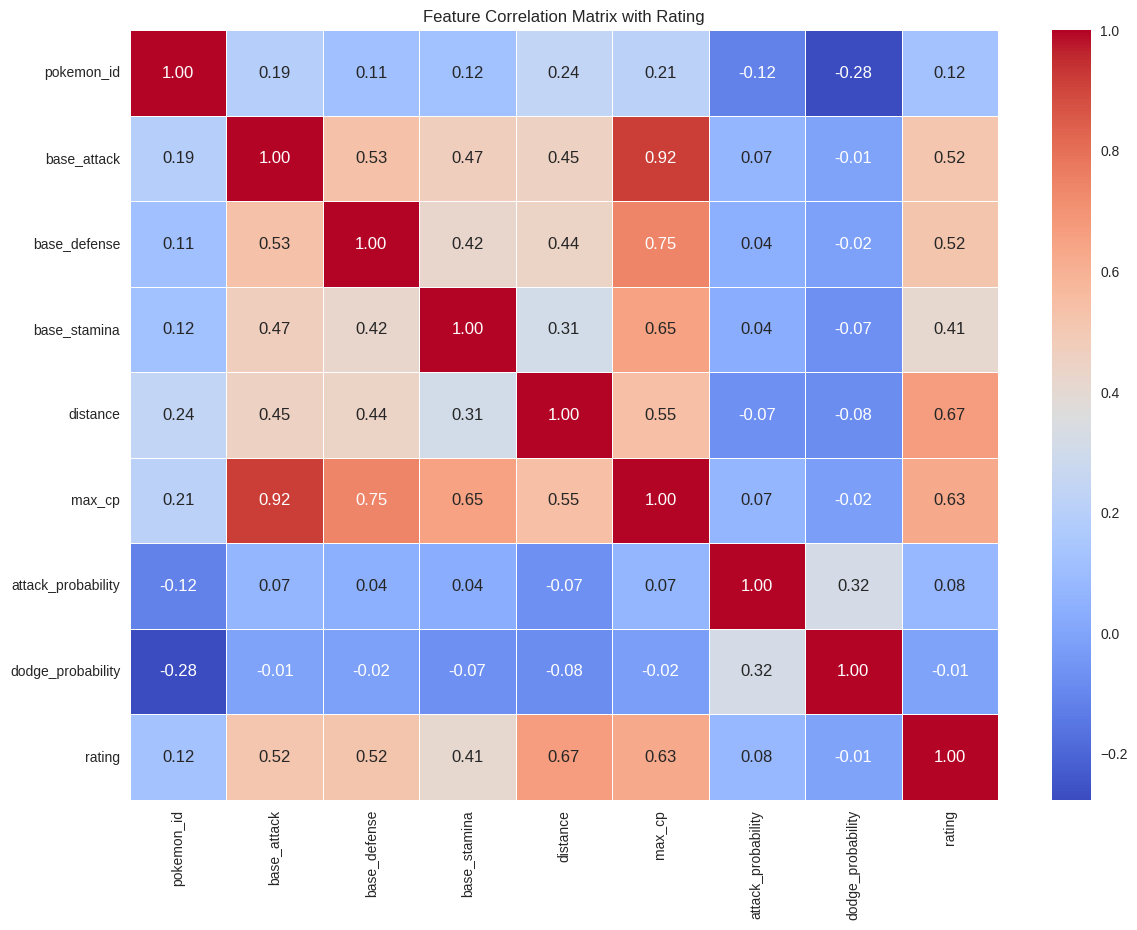

In [56]:
# Correlation Matrix
# ANSWER STARTING HERE
correlation_matrix = histogram_pd.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix with Rating')
plt.show()
# ANSWER ENDS HERE


##### **7.3 *Question*: What have you learned from this correlation map? Why? (2 pts)**
ANSWER RIGHT HERE!

This correlation map highlights which features are most relevant for predicting ratings and helps refine feature selection for better model performance and simpler models. I noticed that features such as base_attack, base_defense, and max_cp show strong positive correlations with rating (around 0.52, 0.52, and 0.63 respectively). This indicates that Pokémon with higher base attack and defense values, as well as higher maximum CP, tend to have higher ratings. Distance has a correlation of 0.67 with rating, suggesting that it plays a key role in determining a Pokémon's rating. Attack_probability and dodge_probability have low correlations with rating (close to 0 or negative), indicating that they are less impactful on the rating and might be less valuable for predictive modeling.